## E7. Visualización de datos de agua

### Carga de datos desde fichero CSV
La carga de datos en pandas es una de las tareas más comunes y puede realizarse utilizando la función pd.read_csv() para archivos CSV.

In [3]:
import pandas as pd
import numpy as np

# Carga de datos de Agua
agua_df = pd.read_csv('data/m1_e7_datos_agua_dia.csv', index_col=0)
print(agua_df.head())

               Consumo
Fecha                 
2024-01-01  695.242005
2024-01-02  552.235756
2024-01-03  667.603976
2024-01-04  573.564748
2024-01-05  670.054368


### Gráfico de Barras:
Los gráficos de barras se utilizan principalmente para comparar cantidades entre diferentes categorías o grupos.

#### Características principales:
- **Comparación de categorías**: Son ideales para mostrar comparaciones directas entre diferentes grupos o categorías. Cada barra representa una categoría, y la altura o longitud de la barra indica la cantidad asociada a esa categoría.
- **Visualización discreta**: Se utilizan mejor para datos discretos (por ejemplo, ventas por producto, población por país, etc.).
- **Claridad en diferencias**: Ayuda a visualizar diferencias entre categorías que no están relacionadas de forma secuencial.

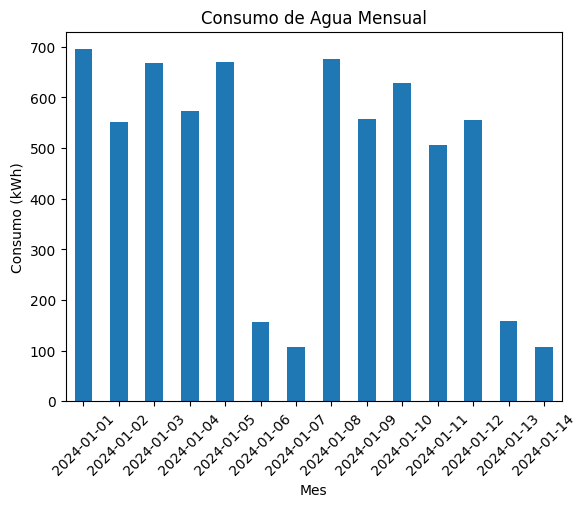

In [4]:
import matplotlib.pyplot as plt

# Seleccionamos una porción del dataset
plot_df = agua_df[:14]
plot_df['Consumo'].plot(kind='bar')
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

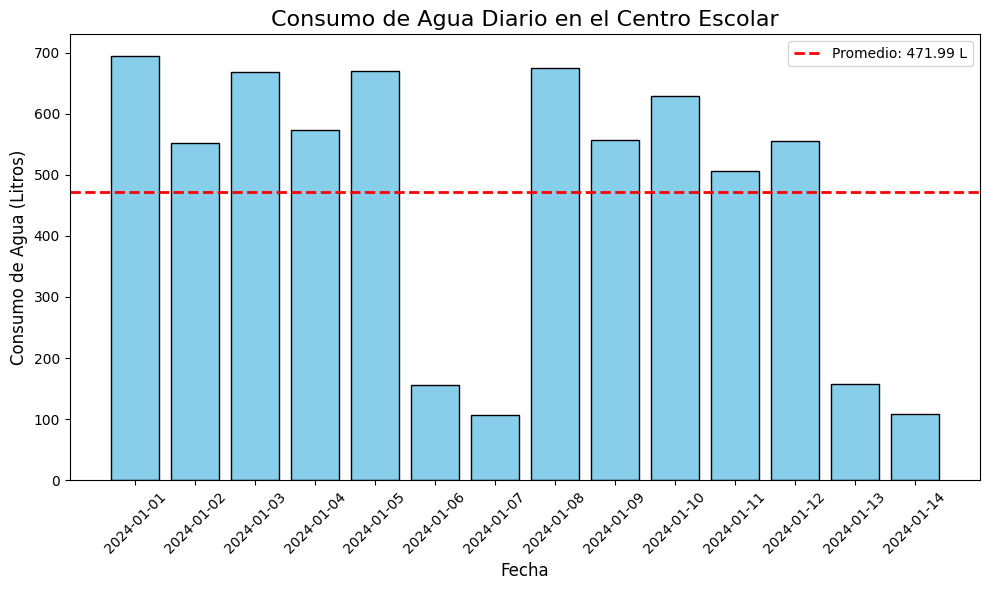

In [5]:
# Calcular el promedio de la columna 'Consumo_Agua_Litros'
mean_consumo = plot_df['Consumo'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(plot_df.index, plot_df['Consumo'], color='skyblue', edgecolor='black')

# Añadir una línea horizontal que indique el promedio
plt.axhline(y=mean_consumo, color='red', linestyle='--', linewidth=2, label=f'Promedio: {mean_consumo:.2f} L')

# Añadir etiquetas y título
plt.title('Consumo de Agua Diario en el Centro Escolar', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo de Agua (Litros)', fontsize=12)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Gráfico de Líneas:
Los gráficos de líneas son útiles para visualizar la evolución de una variable a lo largo del tiempo o para mostrar la relación entre datos secuenciales.

#### Características principales:
- **Tendencias a lo largo del tiempo**: Se utilizan principalmente para mostrar cómo cambian las variables continuas a lo largo del tiempo o en secuencias ordenadas. Es ideal para series temporales.
- **Continuidad**: Conectan puntos de datos con líneas, lo que ayuda a resaltar las tendencias o patrones en datos continuos.
- **Diferencias sutiles**: Las líneas permiten visualizar pequeños cambios o variaciones entre los puntos de datos.

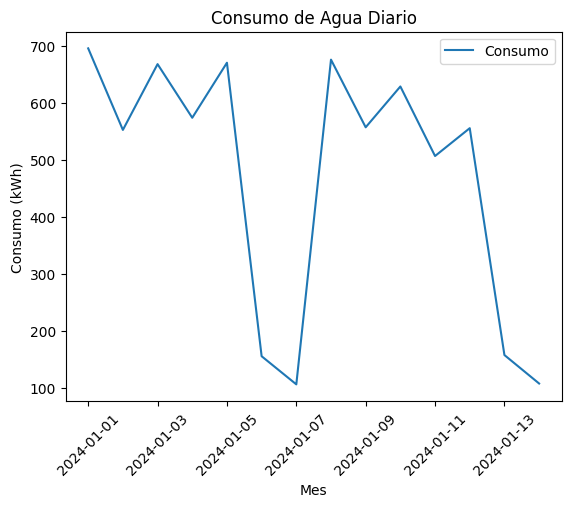

In [6]:
plot_df[['Consumo']].plot()
plt.title('Consumo de Agua Diario')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

El gráfico de líneas para un con junto de datos tan pequeño hace más dificil apreciar las diferencias. SIn emabrgo, si mostramos un rango más largo

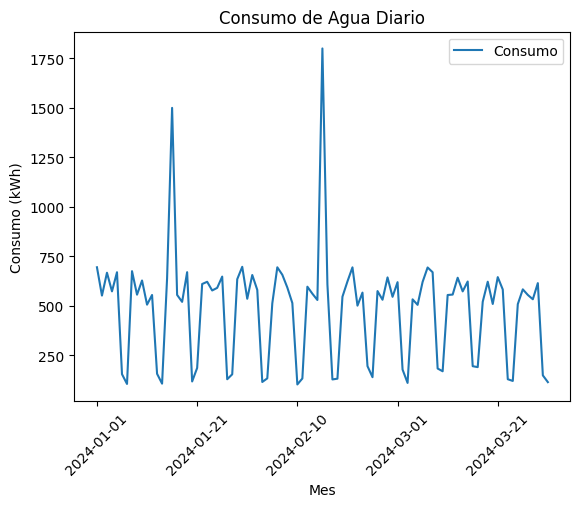

In [7]:
agua_df[['Consumo']].plot()
plt.title('Consumo de Agua Diario')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

Y ahora dando un poco de estilo al gráfico

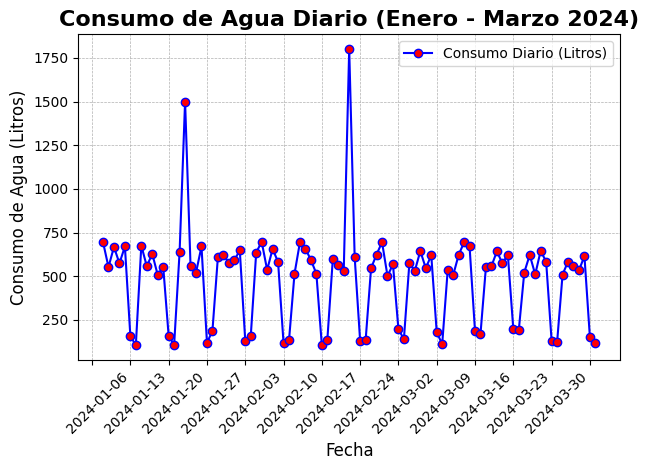

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Dibujar la línea con un estilo más estilizado
plt.plot(agua_df.index, agua_df['Consumo'], color='blue', linestyle='-', marker='o', markersize=6, 
         markerfacecolor='red', label='Consumo Diario (Litros)')

# Mejorar la visualización de los ejes
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Mostrar una marca por semana
plt.xticks(rotation=45, ha='right')  # Rotar las fechas en el eje X

# Añadir etiquetas y título
plt.title('Consumo de Agua Diario (Enero - Marzo 2024)', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo de Agua (Litros)', fontsize=12)

# Añadir una cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Añadir leyenda
plt.legend()

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Por el contrario, un gráfico de barras en un conjunto grande de datos se hace demasiado denso, confuso.

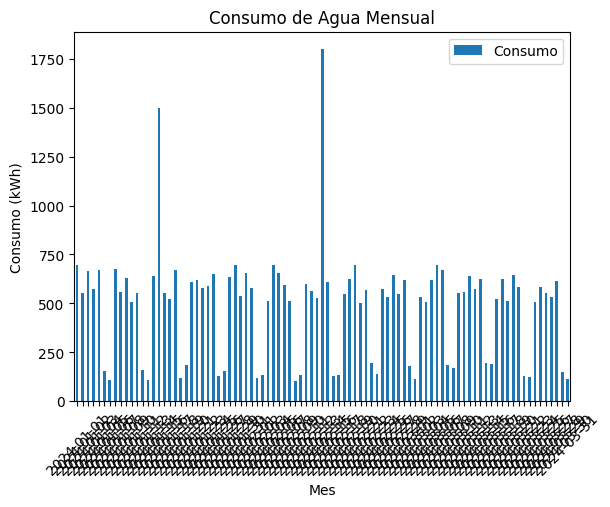

In [9]:
agua_df[['Consumo']].plot(kind='bar')
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

### Histograma
Un histograma es un tipo de gráfico que muestra la distribución de frecuencias de un conjunto de datos numéricos. Representa cómo se distribuyen los valores de una variable continua o cuantitativa en diferentes rangos o "bins" (intervalos), lo que permite visualizar la forma de la distribución, como si fuera un resumen visual de los datos.

Text(0, 0.5, 'Frecuencia')

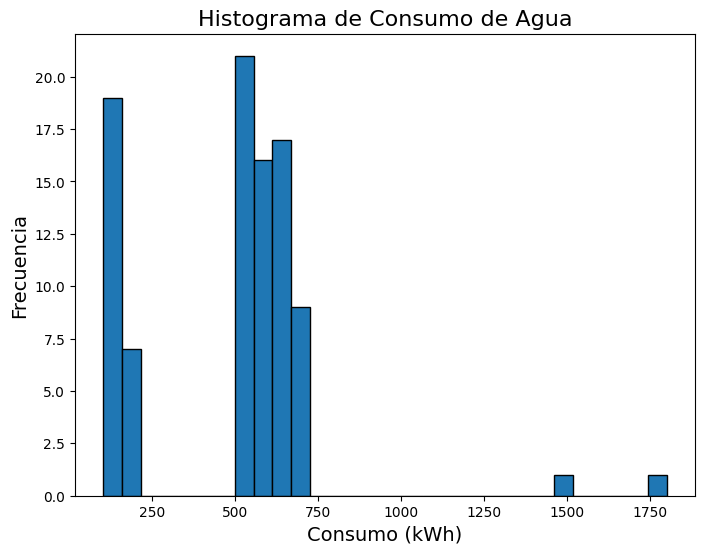

In [10]:
# Crear el histograma de la columna 'Consumo'
plt.figure(figsize=(8, 6))
plt.hist(agua_df['Consumo'], bins=30, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Consumo de Agua', fontsize=16)
plt.xlabel('Consumo (kWh)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

Ahora vamos a generar algunas series comlementarias a partir de la fecha de cada registro

In [11]:
# Generamos una columna con un objeto fecha a partir del índice
agua_df['Datetime'] = pd.to_datetime(agua_df.index)

# Crear nuevas columnas para el mes y el año
agua_df['Día'] = agua_df['Datetime'].dt.day  # Extraer el día
agua_df['Mes'] = agua_df['Datetime'].dt.month  # Extraer el mes
agua_df['Año'] = agua_df['Datetime'].dt.year   # Extraer el año

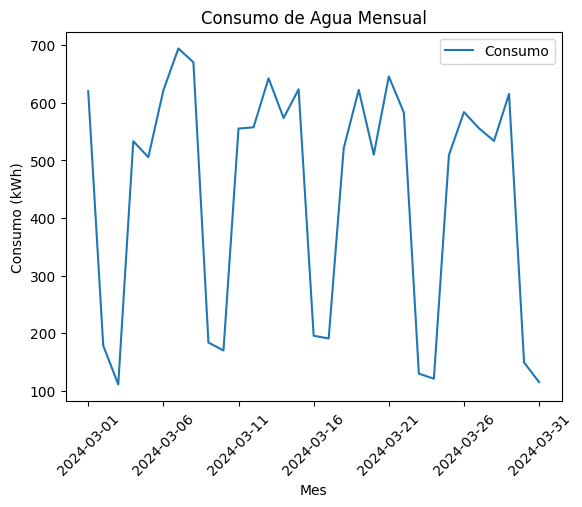

In [12]:
# Filtramos por mes y solo nos quedamos con los datos del mes de Marzo
febrero_df = agua_df[agua_df['Mes'] == 3]
febrero_df[['Consumo']].plot()
plt.title('Consumo de Agua Mensual')
plt.xlabel('Mes')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.show()

Text(0, 0.5, 'Frecuencia')

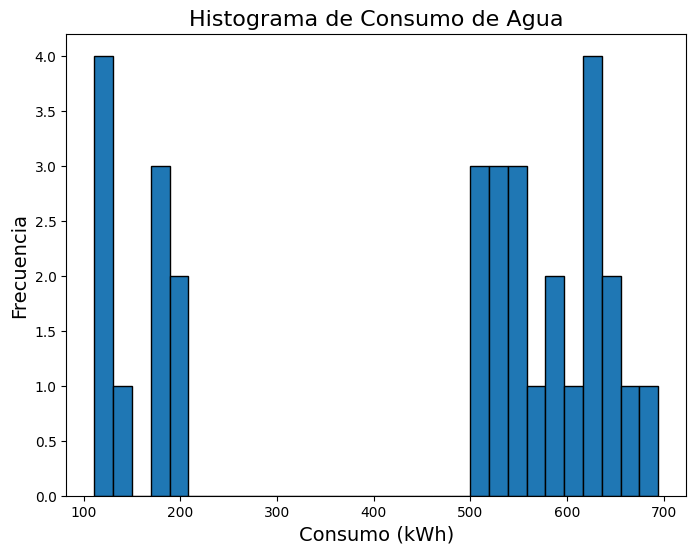

In [13]:
# Crear el histograma de la columna 'Consumo'
plt.figure(figsize=(8, 6))
plt.hist(febrero_df['Consumo'], bins=30, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Consumo de Agua', fontsize=16)
plt.xlabel('Consumo (kWh)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)